In [1]:
import os
import uproot3
import numpy as np

In [2]:
from histogram_data import Bin, BinEdges

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
infile_21l = 'data/largedrum_21L_dense_MedianCut_3cmVoxel_all.discriminator.root'

In [6]:
fu = uproot3.open(infile_21l)
histogram_21l = fu['histMedianMetric'].numpy()[0]
bins_x, bins_y, bins_z = fu['histMedianMetric;1'].numpy()[1][0]

In [7]:
bins_x.shape,bins_y.shape, bins_z.shape

((67,), (67,), (34,))

In [8]:
from dataclasses import dataclass

@dataclass
class Bin:
    left: float
    right: float
    
    def __contains__(self, x: float):
        return (x >= self.left) and (x <= self.right)
    
    def __ge__(self, x: float):
        return self.right >= x
    
    def __le__(self, x: float):
        return self.left <= x
    
    def __gt__(self, x: float):
        return self.right > x
    
    def __lt__(self, x: float):
        return self.left < x
    

In [9]:
x_bins = [Bin(l, r) for l, r in zip(bins_x[:-1], bins_x[1:])]
y_bins = [Bin(l, r) for l, r in zip(bins_y[:-1], bins_y[1:])]
z_bins = [Bin(l, r) for l, r in zip(bins_z[:-1], bins_z[1:])]

In [12]:
sel_x = np.asarray(list(map(lambda b: -440 <= b <= 440, x_bins))).astype(bool)
sel_y = np.asarray(list(map(lambda b: -300 <= b <= 300, y_bins))).astype(bool)
sel_z = np.asarray(list(map(lambda b: -300 <= b <= 300, z_bins))).astype(bool)

sel_x = np.where(sel_x)[0]
sel_y = np.where(sel_y)[0]
sel_z = np.where(sel_z)[0]

print(sel_x.shape, sel_y.shape, sel_z.shape)

xx, yy, zz = np.meshgrid(sel_x, sel_y, sel_z, indexing='ij')

(30,) (20,) (21,)


In [13]:
histogram_21l[xx, yy, zz].shape

(30, 20, 21)

In [14]:
x_bins_a = np.asarray(x_bins)
x_bins_a[sel_x]

array([Bin(left=-454.5454545454545, right=-424.24242424242425),
       Bin(left=-424.24242424242425, right=-393.9393939393939),
       Bin(left=-393.9393939393939, right=-363.6363636363636),
       Bin(left=-363.6363636363636, right=-333.33333333333326),
       Bin(left=-333.33333333333326, right=-303.030303030303),
       Bin(left=-303.030303030303, right=-272.72727272727275),
       Bin(left=-272.72727272727275, right=-242.42424242424238),
       Bin(left=-242.42424242424238, right=-212.12121212121212),
       Bin(left=-212.12121212121212, right=-181.81818181818176),
       Bin(left=-181.81818181818176, right=-151.5151515151515),
       Bin(left=-151.5151515151515, right=-121.21212121212113),
       Bin(left=-121.21212121212113, right=-90.90909090909088),
       Bin(left=-90.90909090909088, right=-60.60606060606051),
       Bin(left=-60.60606060606051, right=-30.303030303030255),
       Bin(left=-30.303030303030255, right=0.0),
       Bin(left=0.0, right=30.303030303030255),
       B

In [16]:
x_bins

[Bin(left=-1000.0, right=-969.6969696969697),
 Bin(left=-969.6969696969697, right=-939.3939393939394),
 Bin(left=-939.3939393939394, right=-909.0909090909091),
 Bin(left=-909.0909090909091, right=-878.7878787878788),
 Bin(left=-878.7878787878788, right=-848.4848484848485),
 Bin(left=-848.4848484848485, right=-818.1818181818182),
 Bin(left=-818.1818181818182, right=-787.8787878787879),
 Bin(left=-787.8787878787879, right=-757.5757575757575),
 Bin(left=-757.5757575757575, right=-727.2727272727273),
 Bin(left=-727.2727272727273, right=-696.969696969697),
 Bin(left=-696.969696969697, right=-666.6666666666666),
 Bin(left=-666.6666666666666, right=-636.3636363636364),
 Bin(left=-636.3636363636364, right=-606.060606060606),
 Bin(left=-606.060606060606, right=-575.7575757575758),
 Bin(left=-575.7575757575758, right=-545.4545454545455),
 Bin(left=-545.4545454545455, right=-515.1515151515151),
 Bin(left=-515.1515151515151, right=-484.8484848484849),
 Bin(left=-484.8484848484849, right=-454.54545

In [19]:
from bins import Bin, select

In [20]:
x_bins = [Bin(l, r) for l, r in zip(bins_x[:-1], bins_x[1:])]

In [34]:
x_bins_centre = [Bin(l,r).centre() for l,r in zip(bins_x[:-1], bins_x[1:])]

In [38]:
np.asarray(x_bins_centre)[selected_bins]

array([-439.39393939, -409.09090909, -378.78787879, -348.48484848,
       -318.18181818, -287.87878788, -257.57575758, -227.27272727,
       -196.96969697, -166.66666667, -136.36363636, -106.06060606,
        -75.75757576,  -45.45454545,  -15.15151515,   15.15151515,
         45.45454545,   75.75757576,  106.06060606,  136.36363636,
        166.66666667,  196.96969697,  227.27272727,  257.57575758,
        287.87878788,  318.18181818,  348.48484848,  378.78787879,
        409.09090909,  439.39393939])

In [21]:
x_bins

[Bin(left=-1000.0, right=-969.6969696969697),
 Bin(left=-969.6969696969697, right=-939.3939393939394),
 Bin(left=-939.3939393939394, right=-909.0909090909091),
 Bin(left=-909.0909090909091, right=-878.7878787878788),
 Bin(left=-878.7878787878788, right=-848.4848484848485),
 Bin(left=-848.4848484848485, right=-818.1818181818182),
 Bin(left=-818.1818181818182, right=-787.8787878787879),
 Bin(left=-787.8787878787879, right=-757.5757575757575),
 Bin(left=-757.5757575757575, right=-727.2727272727273),
 Bin(left=-727.2727272727273, right=-696.969696969697),
 Bin(left=-696.969696969697, right=-666.6666666666666),
 Bin(left=-666.6666666666666, right=-636.3636363636364),
 Bin(left=-636.3636363636364, right=-606.060606060606),
 Bin(left=-606.060606060606, right=-575.7575757575758),
 Bin(left=-575.7575757575758, right=-545.4545454545455),
 Bin(left=-545.4545454545455, right=-515.1515151515151),
 Bin(left=-515.1515151515151, right=-484.8484848484849),
 Bin(left=-484.8484848484849, right=-454.54545

In [22]:
edges = Bin(-440, 440)

In [23]:
edges

Bin(left=-440, right=440)

In [25]:
selected_bins = select(x_bins, edges)

In [26]:
bins_x[selected_bins]

array([-454.54545455, -424.24242424, -393.93939394, -363.63636364,
       -333.33333333, -303.03030303, -272.72727273, -242.42424242,
       -212.12121212, -181.81818182, -151.51515152, -121.21212121,
        -90.90909091,  -60.60606061,  -30.3030303 ,    0.        ,
         30.3030303 ,   60.60606061,   90.90909091,  121.21212121,
        151.51515152,  181.81818182,  212.12121212,  242.42424242,
        272.72727273,  303.03030303,  333.33333333,  363.63636364,
        393.93939394,  424.24242424])

In [27]:
selected_bins

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [29]:
len(x_bins)

66

In [31]:
x_bins_a = np.asarray(x_bins)
x_bins_a[selected_bins]

array([Bin(left=-454.5454545454545, right=-424.24242424242425),
       Bin(left=-424.24242424242425, right=-393.9393939393939),
       Bin(left=-393.9393939393939, right=-363.6363636363636),
       Bin(left=-363.6363636363636, right=-333.33333333333326),
       Bin(left=-333.33333333333326, right=-303.030303030303),
       Bin(left=-303.030303030303, right=-272.72727272727275),
       Bin(left=-272.72727272727275, right=-242.42424242424238),
       Bin(left=-242.42424242424238, right=-212.12121212121212),
       Bin(left=-212.12121212121212, right=-181.81818181818176),
       Bin(left=-181.81818181818176, right=-151.5151515151515),
       Bin(left=-151.5151515151515, right=-121.21212121212113),
       Bin(left=-121.21212121212113, right=-90.90909090909088),
       Bin(left=-90.90909090909088, right=-60.60606060606051),
       Bin(left=-60.60606060606051, right=-30.303030303030255),
       Bin(left=-30.303030303030255, right=0.0),
       Bin(left=0.0, right=30.303030303030255),
       B

In [47]:
from bins import Axes

In [48]:
rootbins = Axes(bins_x, bins_y, bins_z)

In [50]:
rootbins.y

[Bin(left=-1000.0, right=-969.6969696969697),
 Bin(left=-969.6969696969697, right=-939.3939393939394),
 Bin(left=-939.3939393939394, right=-909.0909090909091),
 Bin(left=-909.0909090909091, right=-878.7878787878788),
 Bin(left=-878.7878787878788, right=-848.4848484848485),
 Bin(left=-848.4848484848485, right=-818.1818181818182),
 Bin(left=-818.1818181818182, right=-787.8787878787879),
 Bin(left=-787.8787878787879, right=-757.5757575757575),
 Bin(left=-757.5757575757575, right=-727.2727272727273),
 Bin(left=-727.2727272727273, right=-696.969696969697),
 Bin(left=-696.969696969697, right=-666.6666666666666),
 Bin(left=-666.6666666666666, right=-636.3636363636364),
 Bin(left=-636.3636363636364, right=-606.060606060606),
 Bin(left=-606.060606060606, right=-575.7575757575758),
 Bin(left=-575.7575757575758, right=-545.4545454545455),
 Bin(left=-545.4545454545455, right=-515.1515151515151),
 Bin(left=-515.1515151515151, right=-484.8484848484849),
 Bin(left=-484.8484848484849, right=-454.54545

In [144]:
import matplotlib.pyplot as plt

In [204]:
from bins import Hist, Bin

In [205]:
histogram21l = Hist(infile_21l)
histogram_bitumen = Hist(infile='data/largedrum_onlybitumen_dense_newmetrics_3cmVoxel_April2021.discriminator.root')
histogram_hydrogen = Hist(infile='data/largedrum_onlyhydrogen_dense_newmetrics_3cmVoxel_April2021.discriminator.root')

In [206]:
centre_21l = histogram21l.cube_select(Bin(-100,100), Bin(-100,100), Bin(-100,100))
centre_bitumen = histogram_bitumen.cube_select(Bin(-100,100), Bin(-100,100), Bin(-100,100))
centre_hydrogen = histogram_hydrogen.cube_select(Bin(-100,100), Bin(-100,100), Bin(-100,100))

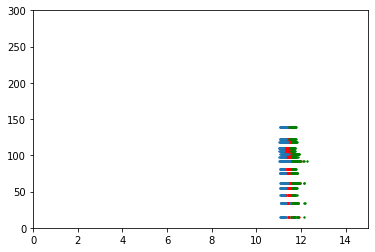

In [209]:
plt.scatter(centre_21l.distance_x_axis().median, centre_21l.distance_x_axis().distance, s=2, color='red')
plt.scatter(centre_bitumen.distance_x_axis().median, centre_bitumen.distance_x_axis().distance, s=2)
plt.scatter(centre_hydrogen.distance_x_axis().median, centre_hydrogen.distance_x_axis().distance, s=2, color='green')

plt.ylim(0,300)
plt.xlim(0,15)
plt.show()


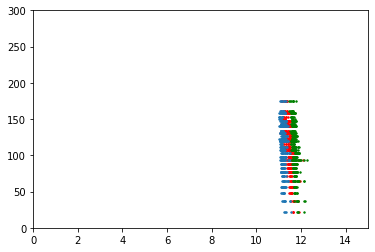

In [211]:
plt.scatter(centre_21l.distance_xyz().median, centre_21l.distance_xyz().distance, s=2, color='red')
plt.scatter(centre_bitumen.distance_xyz().median, centre_bitumen.distance_xyz().distance, s=2)
plt.scatter(centre_hydrogen.distance_xyz().median, centre_hydrogen.distance_xyz().distance, s=2, color='green')


plt.ylim(0,300)
plt.xlim(0,15)
plt.show()



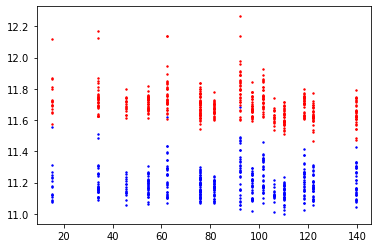

In [212]:
#plt.scatter(centre_21l.distance_x_axis()[0], centre_21l.distance_x_axis()[1], s=2, color='red')
plt.scatter(centre_bitumen.distance_x_axis().distance, centre_bitumen.distance_x_axis().median, s=2, c='blue')
plt.scatter(centre_hydrogen.distance_x_axis().distance, centre_hydrogen.distance_x_axis().median, s=2, color='red')

#plt.xlim(0,300)
#plt.ylim(0,15)
plt.show()



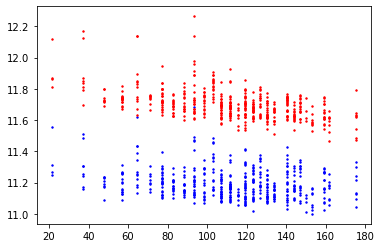

In [213]:
#plt.scatter(centre_21l.distance_x_axis()[0], centre_21l.distance_x_axis()[1], s=2, color='red')
plt.scatter(centre_bitumen.distance_xyz().distance, centre_bitumen.distance_xyz().median, s=2, c='blue')
plt.scatter(centre_hydrogen.distance_xyz().distance, centre_hydrogen.distance_xyz().median, s=2, color='red')

#plt.xlim(0,300)
#plt.ylim(0,15)
plt.show()

